---
# EXERCISE 3: 2048
---

[2048 Game](https://play2048.co/)

### 3.1 MDP

##### 3.1.1. State Space
    s = [k_00, k_01, ..., k_ij, ..., k_33]
    k_ij = 0 empty cell, or 1, 2, ..., 11 if contains 2^k_ij
    i = 0, ..., 3
    j = 0, ..., 3
12^16 states

##### 3.1.2. Actions Space
    a = [0, 1, 2, 3]
    0 -> left
    1 -> up
    2 -> right
    3 -> down

##### 3.1.3. Transition function
Move and fuse the cells according to the direction, spawn a new cell in a random empty cell (2 or 4 with a specific probability).

##### 3.1.3. Reward function
- Reward is the sum of the values of the cells that fuse.
- If no cell fuses, reward is -1.

##### 3.1.4 Aux funtions to draw

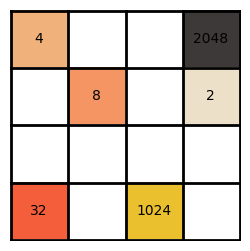

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

def show_2048(states_vector:np.array, ax, colormap = 'Reds'):

    states_values = states_vector.reshape((4,4))

    # BACKGROUND
    background = np. zeros((4,4,3), dtype=np.uint8)
    
    colors = ['#FFFFFF', '#EDE0C8', '#F2B179', '#F59563', '#F67C5F',
            '#F65E3B', '#EDCF72', '#EDCC61', '#EDC850', '#EDC53F',
            '#EDC22E', '#3E3939']

    cmap = mcolors.LinearSegmentedColormap.from_list('2048', colors)

    normalized_color = states_values/11

    for i in range(4):
        for j in range(4):
            background[i,j,:] = np.array(cmap(normalized_color[i,j])[:3])*255
    ax.imshow(background)

    # VALUES
    for i in range(4):
        for j in range(4):
            if colormap is not None:
                if states_values[i,j] > 0:
                    ax.text(j, i, str(round(2**states_values[i,j])), va='center', ha='center', color='k'[:3])

    for i in range(5):
        ax.axvline(x=i-0.49, color='k', linewidth=2)
    for i in range(5):
        ax.axhline(y=i-0.49, color='k', linewidth=2)

    ax.axis('off')

    ax.set_xlim(-0.51, 3.53)
    ax.set_ylim(3.53, -0.51)


s = np.zeros((16))
s[0] = 2
s[3] = 11
s[5] = 3
s[7] = 1
s[12] = 5
s[14] = 10

fig, axs = plt.subplots(1, 1, figsize=(3, 3))
show_2048(s, axs)
plt.show()

# Actions
actions_dict = {0: 'left', 1: 'up', 2: 'right', 3: 'down'}

##### 3.1.5 Game implementation (transition function)

In [2]:
# Move and fuse pieces
def move_pieces(mat, a):     
    r = 0 # reward

    # LEFT
    if a == 0: 
        for i in range(4):
            for j in range(3):
                if mat[i, j] == 0:
                    for k in range(j+1, 4):
                        if mat[i, k] != 0:
                            mat[i, j] = mat[i, k]
                            mat[i, k] = 0
                            break
        for i in range(4):
            for j in range(3):
                if mat[i, j] == mat[i, j+1]  and mat[i, j] != 0:
                    mat[i, j] +=1
                    mat[i, j+1] = 0
                    r += 2**mat[i, j]
    # UP
    elif a == 1:
        for j in range(4):
            for i in range(3):
                if mat[i, j] == 0:
                    for k in range(i+1, 4):
                        if mat[k, j] != 0:
                            mat[i, j] = mat[k, j]
                            mat[k, j] = 0
                            break
        for j in range(4):
            for i in range(3):
                if mat[i, j] == mat[i+1, j]  and mat[i, j] != 0:
                    mat[i, j] +=1
                    mat[i+1, j] = 0
                    r += 2**mat[i, j]

    # RIGHT
    elif a == 2:
        for i in range(4):
            for j in range(3, 0, -1):
                if mat[i, j] == 0:
                    for k in range(j-1, -1, -1):
                        if mat[i, k] != 0:
                            mat[i, j] = mat[i, k]
                            mat[i, k] = 0
                            break
        for i in range(4):
            for j in range(3, 0, -1):
                if mat[i, j] == mat[i, j-1]  and mat[i, j] != 0:
                    mat[i, j] +=1
                    mat[i, j-1] = 0
                    r += 2**mat[i, j]
    
    # DOWN
    elif a == 3:
        for j in range(4):
            for i in range(3, 0, -1):
                if mat[i, j] == 0:
                    for k in range(i-1, -1, -1):
                        if mat[k, j] != 0:
                            mat[i, j] = mat[k, j]
                            mat[k, j] = 0
                            break
        for j in range(4):
            for i in range(3, 0, -1):
                if mat[i, j] == mat[i-1, j] and mat[i, j] != 0:
                    mat[i, j] +=1
                    mat[i-1, j] = 0
                    r += 2**mat[i, j]

    return mat, r

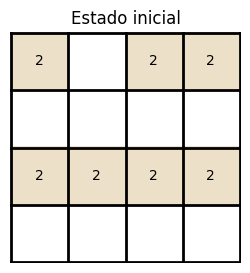

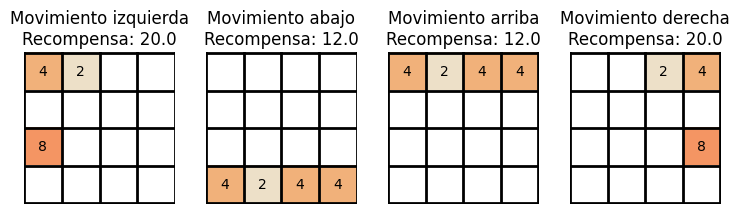

In [3]:
def move_pieces_iterative(mat, a):
    r_total = 0
    old_mat = mat.copy()
    while True: 
        new_mat, r = move_pieces(old_mat.copy(), a)
        r_total += r

        if np.all(new_mat == old_mat):
            break

        old_mat = new_mat

    return new_mat, r_total


fig, axs = plt.subplots(1, 1, figsize=(3, 3))
s = np.zeros((16))
s[0] = 1
s[2] = 1
s[3] = 1
s[8:12] = 1
show_2048(s, axs)
axs.set_title('Initial')

act = 0 # LEFT
s_res_left, r_left = move_pieces_iterative(s.reshape(4,4), act)

act = 1 # UP
s_res_up, r_up = move_pieces_iterative(s.reshape(4,4), act)

act = 2 # RIGHT
s_res_right, r_right = move_pieces_iterative(s.reshape(4,4), act)

act = 3 # DOWN
s_res_down, r_down = move_pieces_iterative(s.reshape(4,4), act)

fig, axs = plt.subplots(1, 4, figsize=(9, 9))
show_2048(s_res_left, axs[0])
show_2048(s_res_down, axs[1])
show_2048(s_res_up, axs[2])
show_2048(s_res_right, axs[3])

axs[0].set_title('Movimiento izquierda\nRecompensa: {}'.format(r_left))
axs[1].set_title('Movimiento abajo\nRecompensa: {}'.format(r_down))
axs[2].set_title('Movimiento arriba\nRecompensa: {}'.format(r_up))
axs[3].set_title('Movimiento derecha\nRecompensa: {}'.format(r_right))
plt.show()

In [9]:
# All possible transitions (spawn 2 or 4 in a free cell)

def all_transitions_2048(s, a, prob_2=0.8, prob_4=0.2):
    s_in = s.copy()
    s_out, r = move_pieces_iterative(s_in.reshape(4,4), a)
    s_out = s_out.reshape(16)

    if r == 0:
        r = -1

    if np.all(s_in == s_out):
        return s_out, r, [1]

    s_out_final = []
    probs = []
    free_cells = np.where(s_out == 0)[0]
    for free_cell in free_cells:

        new_s_2 = s_out.copy()
        new_s_2[free_cell] = 1
        new_s_4 = s_out.copy()
        new_s_4[free_cell] = 2
        s_out_final.append(new_s_2)
        probs.append(prob_2)
        s_out_final.append(new_s_4)
        probs.append(prob_4)

    return s_out_final, r, probs

Given function:

    S', r = all_transitions_2048(s, a)

For each s' of S':

    T(s, a, s') = 1 / (nº empty cells after move) * prob_2 if s' is a spawn of 2
    T(s, a, s') = 1 / (nº empty cells after move) * prob_4 if s' is a spawn of 4
    R(s, a, s') = r

Posibles evoluciones: 30


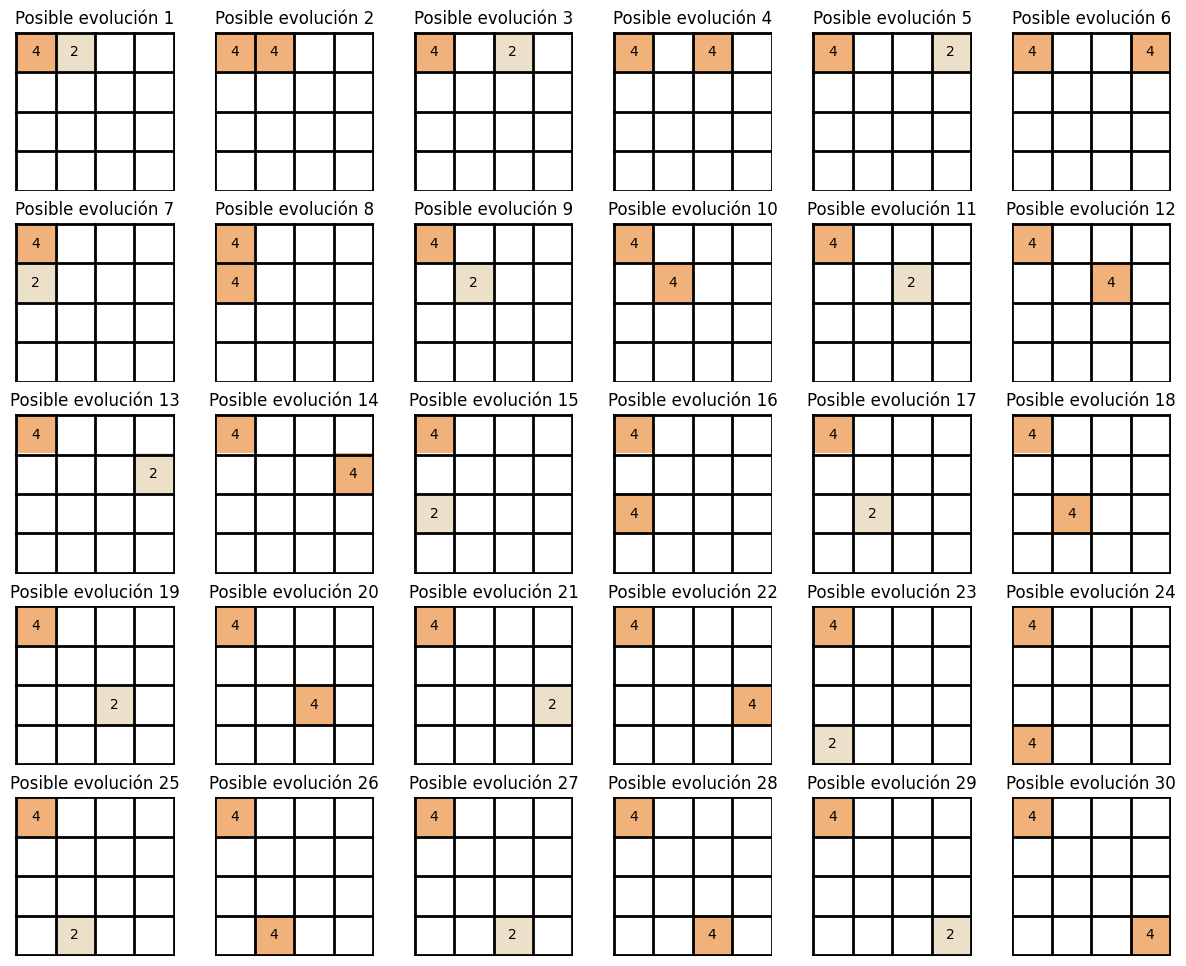

In [5]:
s = np.zeros((16))
s[0] = 1
s[2] = 1
a = 0 # LEFT

possible_sp, r, _ = all_transitions_2048(s, a)
print('Posibles evoluciones: {}'.format(len(possible_sp)))

fig, axs = plt.subplots(5, 6, figsize=(15, 12))
for i, sp in enumerate(possible_sp):
    ax = axs[i//6, i%6]
    show_2048(sp, ax)
    ax.set_title('Posible evolución {}'.format(i+1))
plt.show()

In [6]:
# To simulate a transition we pick one of the possible transitions according to the probabilities

def simulate_2048(s, a):
    S, r, probabilities = all_transitions_2048(s, a)

    # Escoger aleatoriamente una evolución
    if isinstance(S, list):
        S = np.array(S)
        probabilities = np.array(probabilities)
        probabilities = probabilities / np.sum(probabilities)
        idx = np.random.choice(np.arange(len(S)), p=probabilities)
        S = S[idx]
        
    return S, r

n_actions = 4
gamma = 0.9

### 3.2 Monte Carlo Tree Search

In [10]:
def mcts_bonus(Nsa:float, Ns:float, c:float):
    if Nsa == 0.0:
        return np.inf
    
    return c * np.sqrt(np.log(Ns) / Nsa)

def mcts_explore(s:tuple, d:int, N:dict, Q:dict, c:float):
    actions = np.arange(n_actions)
    Ns = sum(N[(s,a)] for a in actions)
    a = np.argmax([Q[(s,a)] + mcts_bonus(N[(s,a)], Ns, c) for a in actions])
    return a

def mcts_simulate(s:tuple, d:int, N:dict, Q:dict, c:float):
    
    if d <= 0:
        return 0

    actions = np.arange(n_actions)

    if not ((s, actions[0]) in N):
        for a in actions:
            N[(s,a)] = 0
            Q[(s,a)] = 0
        
        return 0
    
    a = mcts_explore(s, d, N, Q, c)

    sp, r = simulate_2048(np.array(s), a)
    sp = tuple(sp)


    q = r + gamma * mcts_simulate(sp, d-1, N, Q, c)
    N[(s,a)] += 1
    Q[(s,a)] += (q - Q[(s,a)]) / N[(s,a)]

    return q

def mcts(s:tuple, d:int, n_iter:int, c:float = 100):
    N = {}
    Q = {}
    for i in range(n_iter):
        mcts_simulate(s, d, N, Q, c)
    
    a = np.argmax([Q[(s,a)] for a in np.arange(n_actions)])

    return a

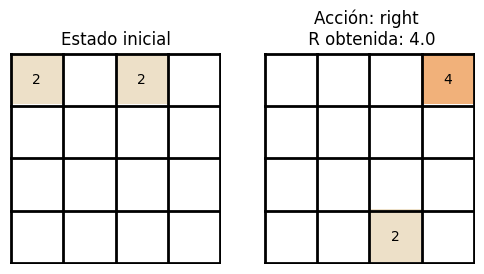

In [11]:
s = np.zeros((16))
s[0] = 1
s[2] = 1

a = mcts(tuple(s), 100, 100)
sp, r = simulate_2048(s, a)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].set_title('Estado inicial')
axs[1].set_title('Acción: {} \n R obtenida: {}'.format(actions_dict[a], r))

show_2048(s, axs[0])
show_2048(sp, axs[1])
plt.show()

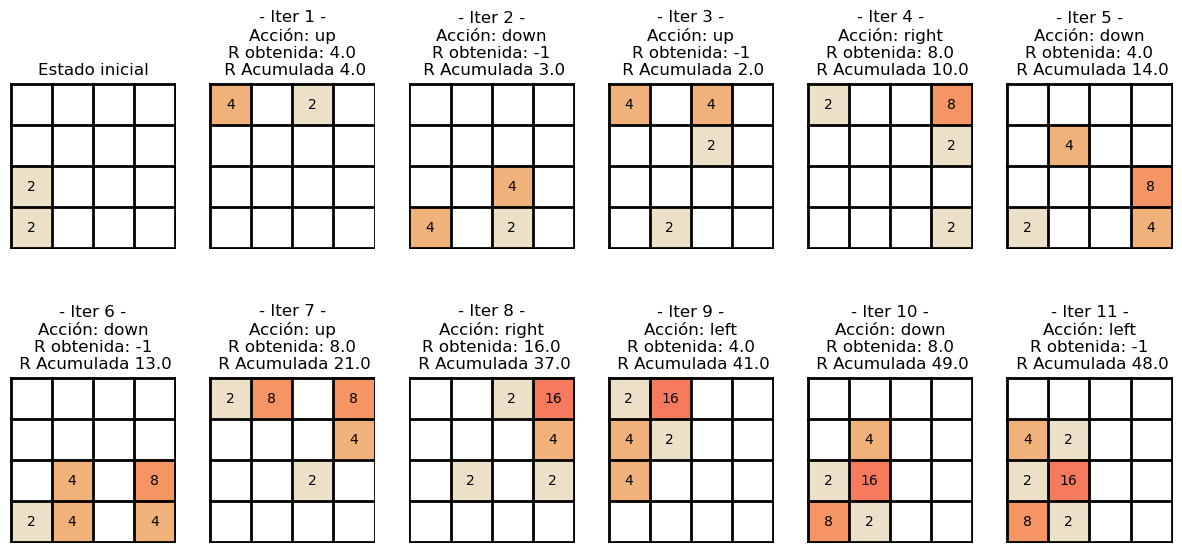

In [10]:
s = np.zeros((16))
s[np.random.choice(16, 2, replace=False)] = np.random.choice([1,2], 2, replace=True)

fig, axs = plt.subplots(2, 6, figsize=(15, 7))
show_2048(s, axs[0,0])
axs[0,0].set_title('Estado inicial')

r_total = 0
for i in range(11):

    a = mcts(tuple(s), 100, 100)
    sp, r = simulate_2048(s, a)
    r_total += r

    if i < 5:
        ax = axs[0,i+1]
    else:
        ax = axs[1,i-5]

    show_2048(sp, ax)
    ax.set_title('- Iter {} -\nAcción: {}\nR obtenida: {}\n R Acumulada {}'.format(i+1, actions_dict[a], r, r_total))
    
    s = sp

In [22]:
def test_2048(n_iter:int, d:int, c:float, save_path:str = None):
    s = np.zeros((16))
    s[np.random.choice(16, 2, replace=False)] = np.random.choice([1,2], 2, replace=True)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    show_2048(s, axs[0])
    axs[0].set_title('Estado inicial')

    if save_path is not None:
        fig_, axs_ = plt.subplots(1, 1, figsize=(3, 3), dpi=100)
        show_2048(s, axs_)
        axs_.set_title('I: {}'.format(0))
        plt.savefig(save_path + '/0.png')
        plt.close()

    r_total = 0
    for i in range(10000):
        a = mcts(tuple(s), d, n_iter, c)
        sp, r = simulate_2048(s, a)
        r_total += r

        if save_path is not None:
            fig_, axs_ = plt.subplots(1, 1, figsize=(3, 3), dpi=100)
            show_2048(sp, axs_)
            axs_.set_title('I: {} - A: {}'.format(i+1, actions_dict[a]))
            plt.savefig(save_path + '/{}.png'.format(i+1))
            plt.close()

        if np.all(s == sp) and np.all(sp != 0):
            break
        
        if np.any(sp == 11):
            break

        s = sp

        print ('Iteración: {} - Acción: {} - R: {} - R acumulada: {}'.format(i+1, actions_dict[a], r, r_total))

    
    show_2048(s, axs[1])
    axs[1].set_title('Estado final')
    print('R total: {}'.format(r_total))
    print('Número de iteraciones: {}'.format(i+1))

Iteración: 1 - Acción: right - R: -1 - R acumulada: -1
Iteración: 2 - Acción: up - R: -1 - R acumulada: -2
Iteración: 3 - Acción: down - R: -1 - R acumulada: -3
Iteración: 4 - Acción: right - R: 12.0 - R acumulada: 9.0
Iteración: 5 - Acción: down - R: 24.0 - R acumulada: 33.0
Iteración: 6 - Acción: right - R: -1 - R acumulada: 32.0
Iteración: 7 - Acción: right - R: -1 - R acumulada: 31.0
Iteración: 8 - Acción: up - R: 12.0 - R acumulada: 43.0
Iteración: 9 - Acción: up - R: -1 - R acumulada: 42.0
Iteración: 10 - Acción: up - R: -1 - R acumulada: 41.0
Iteración: 11 - Acción: right - R: 28.0 - R acumulada: 69.0
Iteración: 12 - Acción: up - R: 32.0 - R acumulada: 101.0
Iteración: 13 - Acción: right - R: 4.0 - R acumulada: 105.0
Iteración: 14 - Acción: right - R: 8.0 - R acumulada: 113.0
Iteración: 15 - Acción: left - R: -1 - R acumulada: 112.0
Iteración: 16 - Acción: up - R: 24.0 - R acumulada: 136.0
Iteración: 17 - Acción: down - R: 4.0 - R acumulada: 140.0
Iteración: 18 - Acción: right -

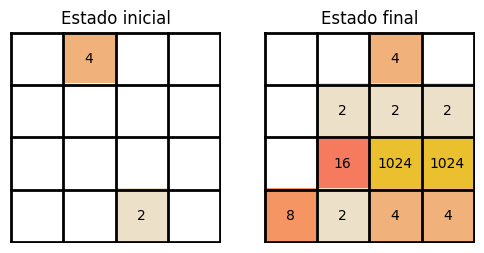

In [26]:
test_2048(1000, 10, 100, save_path='test_2048')

In [30]:
# make a video from the images
import os
import cv2
import numpy as np

def make_video(images, outvid=None, fps=4, size=None,
                is_color=True, format="XVID"):
     fourcc = cv2.VideoWriter_fourcc(*format)
     vid = None
     for image in images:
          if not os.path.exists(image):
                raise FileNotFoundError(image)
          img = cv2.imread(image)
          if vid is None:
                if size is None:
                 size = img.shape[1], img.shape[0]
                vid = cv2.VideoWriter(outvid, fourcc, float(fps), size, is_color)
          if size[0] != img.shape[1] and size[1] != img.shape[0]:
                img = cv2.resize(img, size)
          vid.write(img)
     vid.release()
     return vid

images = [img for img in os.listdir('test_2048') if img.endswith(".png")]
images = sorted(images, key=lambda x: int(x.split('.')[0]))
images = ['test_2048/' + img for img in images]
make_video(images, outvid='test_2048_fast.mp4', fps=8)


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


< cv2.VideoWriter 0x7f5feb24de90>